# FIT5196 Assessment 3: Data Integration & Data Reshaping
#### Student Name: Tan Kah Wang
#### Student ID: 29442826

Date: 25/10/2018

Environment: Python 3.6.6 and Jupyter notebook
Libraries used: 
* pandas (for data integration using dataframes, included in Anaconda Python 3.6.6) 
* numpy (for data integration, included in Anaconda Python 3.6.6)
* xml.etree.ElementTree (for reading in xml files, included in Anaconda Python 3.6.6)
* json (for reading in json files, included in Anaconda Python 3.6.6)
* datetime (for converting time string into time, included in Anaconda Python 3.6.6)
* shapefile (for reading in shapefiles, included in Anaconda Python 3.6.6)
* shapely.geometry (for creating Point instance, included in Anaconda Python 3.6.6)
* shapely.geometry.polygon (for creating Polygon instances, included in Anaconda Python 3.6.6)

# Task 1 - Data Integration

## A1. Introduction
In the first task, we are given 7 datasets in various formats and we are supposed to integrate these 7 datasets into one final dataframe. The data is about housing information in Victoria, Australia.

## A2. Import libraries

In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as etree
import json
import datetime as dt
import shapefile
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

## A3. Reading in housing data
We are given two housing datasets and they are in xml and json format. <br>
In this section, we will load both datasets in and integrate them into one housing dataset.

### A3.1 Reading in real_state.xml
Using `xml.etree.ElementTree` package, we parse the data in and explore the structure of the dataset. <br>
Notice there are 10 childrens under the root in this dataset.

In [2]:
tree = etree.parse("./real_state.xml")  
root = tree.getroot()
print ("the total number of rows: ", len(root))
for child in root:           
    print (child)

the total number of rows:  10
<Element 'bathrooms' at 0x0000019BF6EBA9A8>
<Element 'price' at 0x0000019BF6F6AD68>
<Element 'bedrooms' at 0x0000019BF6FEF138>
<Element 'parking_space' at 0x0000019BF706B458>
<Element 'year' at 0x0000019BF70E5778>
<Element 'lat' at 0x0000019BF715FA98>
<Element 'lng' at 0x0000019BF71DEDB8>
<Element 'property_type' at 0x0000019BF7261138>
<Element 'addr_street' at 0x0000019BF72DD458>
<Element 'property_id' at 0x0000019BF735AA48>


We can then extract the 10 children into individual lists so that we can combine the 10 columns into a pandas dataframe.

In [3]:
# bathrooms is the first child
bathrooms = [] 
for i in range (0,len(root[0])):
    bathrooms.append(float(root[0][i].text)) 
# price is the second child
price = [] 
for i in range (0,len(root[1])):
    price.append(float(root[1][i].text))
# bedrooms is the third child
bedrooms = [] 
for i in range (0,len(root[2])):
    bedrooms.append(float(root[2][i].text))
# parking_space is the fourth child
parking_space = [] 
for i in range (0,len(root[3])):
    parking_space.append(float(root[3][i].text))
# year is the fifth child
year = [] 
for i in range (0,len(root[4])):
    year.append(float(root[4][i].text))
# lat is the sixth child
lat = [] 
for i in range (0,len(root[5])):
    lat.append(float(root[5][i].text))
# lng is the seventh child
lng = [] 
for i in range (0,len(root[6])):
    lng.append(float(root[6][i].text))
# property_type is the eigth child
property_type = [] 
for i in range (0,len(root[7])):
    property_type.append(root[7][i].text)
# addr_street is the ninth child
addr_street = [] 
for i in range (0,len(root[8])):
    addr_street.append(root[8][i].text)
# property_id is the tenth child
property_id = [] 
for i in range (0,len(root[9])):
    property_id.append(float(root[9][i].text))

We then store the 10 lists which contain the 10 individual columns into a pandas dataframe.

In [4]:
# using a dictionary to store the data
xmlDict = {}
xmlDict['bathrooms'] = bathrooms
xmlDict['price'] = price
xmlDict['bedrooms'] = bedrooms
xmlDict['parking_space'] = parking_space
xmlDict['year'] = year
xmlDict['lat'] = lat
xmlDict['lng'] = lng
xmlDict['property_type'] = property_type
xmlDict['addr_street'] = addr_street
xmlDict['property_id'] = property_id
real_state_df = pd.DataFrame(xmlDict,columns=['property_id','lat','lng','addr_street','price','property_type','year','bedrooms','bathrooms','parking_space'])
real_state_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,45745.0,-37.721855,145.120599,1/41 Coventry Street,7440000.0,house,2012.0,3.0,1.0,1.0
1,36585.0,-37.672008,145.024414,83 Derrick Street,3285000.0,house,2012.0,3.0,1.0,1.0
2,35545.0,-37.728758,145.018468,748 Plenty Road,7700000.0,house,2014.0,3.0,1.0,1.0
3,88657.0,-37.950095,145.045347,22 View Street,21000000.0,house,2016.0,4.0,2.0,2.0
4,19711.0,-37.678000,144.900481,33 Raleigh Street,6320000.0,house,2014.0,4.0,2.0,1.0


We check if there are any null values in the dataframe.<br><br>
Notice that the dataset has 1009 rows but we have some columns with only 1005 of entries, indicating 4 null values.

In [5]:
real_state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
property_id      1005 non-null float64
lat              1005 non-null float64
lng              1005 non-null float64
addr_street      1009 non-null object
price            1005 non-null float64
property_type    1009 non-null object
year             1005 non-null float64
bedrooms         1005 non-null float64
bathrooms        1005 non-null float64
parking_space    1005 non-null float64
dtypes: float64(8), object(2)
memory usage: 78.9+ KB


We notice that the null values happened across all columns for the 4 rows.<br>
Also note that some null values are captured as `nan` and not numpy `NaN`.

In [6]:
real_state_df.loc[real_state_df['property_id'].isnull(),:]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
136,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN
656,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN


Since they are all null throughout the columns, we remove them from the dataset.

In [7]:
# replace those in 'nan' to numpy 'NaN'
real_state_df.replace('nan',np.NaN, inplace=True)
# we drop these 4 rows
real_state_df.dropna(axis=0,how='all',inplace=True)

### A3.2 Reading in real_state.json
Using `json` package, we parse the data in and explore the structure of the dataset.<br><br>
Notice there are 10 keys in this file and they are the same as those in `real_state.xml` file.

In [8]:
with open('real_state.json') as output:
    json_data = json.load(output)
    
json_data[0].keys()

dict_keys(['property_id', 'lat', 'lng', 'addr_street', 'price', 'property_type', 'year', 'bedrooms', 'bathrooms', 'parking_space'])

We then extract the 10 keys and their values into 10 individual list so that we can combine them into a pandas dataframe afterwhich.

In [9]:
# extract the 10 list of values under the 10 keys and store them in a dataframe
property_id=[]
lat=[]
lng=[]
addr_street=[]
price=[]
property_type=[]
year=[]
bedrooms=[]
bathrooms=[]
parking_space=[]
for i in range (0,len(json_data)):
    property_id.append(json_data[i]['property_id'])
    lat.append(json_data[i]['lat'])
    lng.append(json_data[i]['lng'])
    addr_street.append(json_data[i]['addr_street'])
    price.append(json_data[i]['price'])
    property_type.append(json_data[i]['property_type'])
    year.append(json_data[i]['year'])
    bedrooms.append(json_data[i]['bedrooms'])
    bathrooms.append(json_data[i]['bathrooms'])
    parking_space.append(json_data[i]['parking_space'])

With the 10 individual lists, we do the same as in Section A3.1 by combining them into a pandas dataframe through a dictionary.

In [10]:
# using a dictionary to store the data
jsonDict = {}  
jsonDict['bathrooms'] = bathrooms
jsonDict['price'] = price
jsonDict['bedrooms'] = bedrooms
jsonDict['parking_space'] = parking_space
jsonDict['year'] = year
jsonDict['lat'] = lat
jsonDict['lng'] = lng
jsonDict['property_type'] = property_type
jsonDict['addr_street'] = addr_street
jsonDict['property_id'] = property_id
    
temp_df = pd.DataFrame(jsonDict,columns=['property_id','lat','lng','addr_street','price','property_type','year','bedrooms','bathrooms','parking_space'])
temp_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,3132.0,-37.820307,144.880124,225 Francis Street,8472000.0,house,2014.0,4.0,2.0,2.0
1,15440.0,-37.725515,144.916847,66 Mascoma Street,5320000.0,house,2010.0,3.0,1.0,1.0
2,54582.0,-37.815360,145.035926,5 Xavier Avenue,21510000.0,house,2015.0,3.0,2.0,2.0
3,89228.0,-37.952620,145.005864,15 Sims Street,32480000.0,house,2013.0,5.0,3.0,2.0
4,22064.0,-37.746765,144.967028,16 Sheffield Street,7836000.0,house,2011.0,3.0,1.0,0.0


We check for null values in the dataset.<br><br>
Notice that we have 1010 total number of rows but we only have 1006 entries for all the columns.<br>
Hence, possibility of 4 missing values across the 10 columns.

In [11]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
property_id      1006 non-null float64
lat              1006 non-null float64
lng              1006 non-null float64
addr_street      1006 non-null object
price            1006 non-null float64
property_type    1006 non-null object
year             1006 non-null float64
bedrooms         1006 non-null float64
bathrooms        1006 non-null float64
parking_space    1006 non-null float64
dtypes: float64(8), object(2)
memory usage: 79.0+ KB


Again, the null values happened across all columns in these 4 rows.<br>
Note that some null values are captured as `None` instead of numpy `NaN`.

In [12]:
temp_df.loc[temp_df['property_id'].isnull(),:]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
270,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN
325,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN
848,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN


Since they are all null throughout the columns, we remove them from the dataset.

In [13]:
temp_df.dropna(axis=0,how='all',inplace=True)

### A3.3 Integrating real_state_xml and real_state_json
Once we have loaded both the xml and json files, we integrate both of them into a single pandas dataframe.

In [14]:
real_state_df=pd.concat([real_state_df,temp_df],ignore_index=True)

We change the data types of the 10 columns so that we can integrate the other datasets into this dataframe in the later sections.

In [15]:
# change the data types
real_state_df.loc[:,['property_id','price','year','bedrooms','bathrooms','parking_space']]=real_state_df.loc[:,['property_id','price','year','bedrooms','bathrooms','parking_space']].astype(np.int64)

After data integration of two datasets, we check if there are duplicated records in `property_id` as it is supposed to be unique.

Notice that there were 34 duplicated `property_id`.

In [16]:
sum(real_state_df.property_id.duplicated())

34

Looking at the first 10 records, the rows with duplicated `property_id` have the same entries in all the remaining 9 columns as well.

In [17]:
real_state_df.loc[(real_state_df.duplicated(['property_id'],keep=False)),:].sort_values('property_id').head(10)

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
1005,3132,-37.820307,144.880124,225 Francis Street,8472000,house,2014,4,2,2
997,3132,-37.820307,144.880124,225 Francis Street,8472000,house,2014,4,2,2
1980,3973,-37.818369,144.878920,94 Severn Street,14400000,house,2011,5,3,2
1089,3973,-37.818369,144.878920,94 Severn Street,14400000,house,2011,5,3,2
1650,6036,-37.783688,144.841359,107 Cornwall Road,14064000,house,2015,4,2,2
246,6036,-37.783688,144.841359,107 Cornwall Road,14064000,house,2015,4,2,2
249,10062,-37.790617,144.932319,"14 Barnett Street,",9152000,house,2014,2,1,0
1019,10062,-37.790617,144.932319,"14 Barnett Street,",9152000,house,2014,2,1,0
215,10497,-37.791180,144.928051,39 McCracken St,8910000,house,2011,3,1,2
1023,10497,-37.791180,144.928051,39 McCracken St,8910000,house,2011,3,1,2


Hence, we remove the 34 duplicated records from the dataframe.

In [18]:
# store the first index of each Id with duplicated rows
first_duplicated_id=real_state_df.loc[(real_state_df.duplicated(['property_id'],keep=False)),:].sort_values('property_id').index.tolist()
# drop only one of the two duplicated rows with the same Id
real_state_df=real_state_df.drop(first_duplicated_id)
# reset the index once again after dropping rows
real_state_df=real_state_df.reset_index(drop=True)
# we are working with 1943 properties (i.e. no of rows)
real_state_df.shape

(1943, 10)

After removing the duplicates, the integration of both datasets gives us 1943 rows and 10 columns.

## A4. Integrating hospitals.xlsx
We are given hospitals data which is in .xlsx format and we can use it to calculate `hospital_id` and `distance_to_hospital` which are required in the final dataframe.

We first read in the data.
Since it's a .xlsx file, we need to extract the data from the right spreadsheet.<br>
There's only one sheet in this file `Sheet1`, hence we will parse the hospitals' data in using this sheet.

In [19]:
# read in hospitals.xlsx
temp_hospitals = pd.ExcelFile('./hospitals.xlsx')
# explore the sheets in this xlsx file
print(temp_hospitals.sheet_names)
# parse 'Sheet1' into a pandas dataframe
hospitals=temp_hospitals.parse('Sheet1')
hospitals.head()

['Sheet1']


,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


Since in the hospitals data, it contains the latitude and longitude of the hospitals.<br>
Hence we can calculate the nearest hospital to each property based on the latitude and longitude of the property.

To calculate the distance, we write a function that calculate the distance in metres between two set of coordinates using the haversine formula [1].

In [20]:
# haversine formula that calculate distance between 2 set of coordinates, obtained from reference source [1]
from numpy import radians, cos, sin, arcsin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    m = 6378 * c * 1000
    return round(m,3)

We then write a function that first calculate all the distances between each property and all the hospitals using the `haversine` function defined earlier. Afterwhich, this function will find the nearest hospital based on the smallest distance, and return the nearest hospital's id and distance from the property to this hospital.

In [21]:
# write a function that calculate the distance from each hospital with each property's lat & lng based on haversine formula
# and returns the hospital_id and distance that is the smallest
def find_nearest_hospital(dataframe):
    all_dist=[]
    # store all the distance to each hospital in a list
    for i in range(0,len(hospitals)):
        all_dist.append(haversine(dataframe['lng'],dataframe['lat'],hospitals.iloc[i,2],hospitals.iloc[i,1]))
    # find the minimum distance
    min_dist=min(all_dist)
    # find the hospital id with this minimum distance (i.e. the closest hospital)
    close_hosp=hospitals.iloc[all_dist.index(min_dist),0]
    return pd.Series([close_hosp,min_dist])

We then apply this function `find_nearest_hospital` on the `real_state_df` dataframe and create columns `hospital_id` and `distance_to_hospital` which stores the nearest hospital id and distance from this hospital to the property.

In [22]:
# create column hospital_id that stores the id of the nearest hospital to the property
real_state_df['hospital_id']=real_state_df.apply(find_nearest_hospital,axis=1)[0]
# create column distance_to_hospital that stores the distance from the property to the nearest hospital
real_state_df['distance_to_hospital']=np.int64(real_state_df.apply(find_nearest_hospital,axis=1)[1])
# returns first 5 rows of the data
real_state_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,hospital_id,distance_to_hospital
0,45745,-37.721855,145.120599,1/41 Coventry Street,7440000,house,2012,3,1,1,hospital_075,2269
1,36585,-37.672008,145.024414,83 Derrick Street,3285000,house,2012,3,1,1,hospital_053,2379
2,35545,-37.728758,145.018468,748 Plenty Road,7700000,house,2014,3,1,1,hospital_139,2186
3,88657,-37.950095,145.045347,22 View Street,21000000,house,2016,4,2,2,hospital_082,1530
4,19711,-37.678000,144.900481,33 Raleigh Street,6320000,house,2014,4,2,1,hospital_104,3510


## A5. Integrating shopingcenters.json
We are given shopping centers data which is in .json format and we can use it to calculate `shopping_center_id` and `distance_to_sc` which are required in the final dataframe.

We first read in the data and there are 3 keys in total.

In [23]:
with open('shopingcenters.json') as output:
    sc_data = json.load(output)
    
sc_data[0].keys()

dict_keys(['sc_id', 'lat', 'lng'])

We create 3 list of values for each of the 3 keys and then store this 3 lists into a pandas dataframe.

In [24]:
sc_id=[]
lat=[]
lng=[]
for i in range (0,len(sc_data)):
    sc_id.append(sc_data[i]['sc_id'])
    lat.append(sc_data[i]['lat'])
    lng.append(sc_data[i]['lng'])
    
scDict = {}  
scDict['sc_id'] = sc_id
scDict['lat'] = lat
scDict['lng'] = lng
    
shoppingcenters = pd.DataFrame(scDict,columns=['sc_id','lat','lng'])
shoppingcenters.head()

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920452


We then write a function that first calculate all the distances between each property and all the shopping centers using the `haversine` function defined earlier in Section A4. Afterwhich, this function will find the nearest shopping center based on the smallest distance, and return the nearest shopping center's id and distance from the property to this shopping center.

In [25]:
# write a function that calculate the distance from each shopping center with each property's lat & lng based on 
# haversine formula and returns the shopping_center_id and distance that is the smallest
def find_nearest_sc(dataframe):
    all_dist=[]
    # store the distances of each shopping center to the property
    for i in range(0,len(shoppingcenters)):
        all_dist.append(haversine(dataframe['lng'],dataframe['lat'],shoppingcenters.iloc[i,2],shoppingcenters.iloc[i,1]))
    # find the minimum distance
    min_dist=min(all_dist)
    # find the shopping center id with this minimum distance (i.e. the closest shopping center)
    close_sc=shoppingcenters.iloc[all_dist.index(min_dist),0]
    return pd.Series([close_sc,min_dist])

We then apply this function `find_nearest_sc` on the `real_state_df` dataframe and create columns `shopping_center_id` and `distance_to_sc` which stores the nearest shopping center id and distance from this shopping center to the property.

In [26]:
# create column shopping_center_id that stores the id of the nearest shopping center to the property
real_state_df['shopping_center_id']=real_state_df.apply(find_nearest_sc,axis=1)[0]
# create column distance_to_sc that stores the distance from the property to the nearest shopping center
real_state_df['distance_to_sc']=np.int64(real_state_df.apply(find_nearest_sc,axis=1)[1])
# returns first 5 rows of the dataframe
real_state_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc
0,45745,-37.721855,145.120599,1/41 Coventry Street,7440000,house,2012,3,1,1,hospital_075,2269,SC_009,5490
1,36585,-37.672008,145.024414,83 Derrick Street,3285000,house,2012,3,1,1,hospital_053,2379,SC_062,5839
2,35545,-37.728758,145.018468,748 Plenty Road,7700000,house,2014,3,1,1,hospital_139,2186,SC_047,1508
3,88657,-37.950095,145.045347,22 View Street,21000000,house,2016,4,2,2,hospital_082,1530,SC_079,390
4,19711,-37.678000,144.900481,33 Raleigh Street,6320000,house,2014,4,2,1,hospital_104,3510,SC_059,1778


## A6. Integrating supermarkets.html
We are given supermarkets data which is in .html format and we can use it to calculate `supermarket_id` and `distance_to_supermaket` which are required in the final dataframe.

We read in the data using `pd.read_html` function.

In [27]:
sm_data = pd.read_html("file:./supermarkets.html",index_col=None)
supermarkets=sm_data[0]
supermarkets.head()

,Unnamed: 0,id,lat,lng,type
0,0,S_001,-37.883978,144.735287,Woolworths
1,1,S_002,-41.161591,147.514797,Woolworths
2,2,S_003,-37.984078,145.077167,Woolworths
3,3,S_004,-37.707023,144.938740,Woolworths
4,4,S_005,-37.597670,144.938413,Woolworths


We drop the first column since it's not useful in our integration.

In [28]:
# drop the first column
supermarkets=supermarkets.drop(['Unnamed: 0'],axis=1)
supermarkets.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


We then write a function that first calculate all the distances between each property and all the supermarkets using the `haversine` function defined earlier in Section A4. Afterwhich, this function will find the nearest supermarket based on the smallest distance, and return the nearest supermarket's id and distance from the property to this supermarket.

In [29]:
# write a function that calculate the distance from each supermarket with each property's lat & lng based on 
# haversine formula and returns the supermarket_id and distance that is the smallest
def find_nearest_super(dataframe):
    all_dist=[]
    # store the distances of each supermarket to the property
    for i in range(0,len(supermarkets)):
        all_dist.append(haversine(dataframe['lng'],dataframe['lat'],supermarkets.iloc[i,2],supermarkets.iloc[i,1]))
    # find the minimum distance
    min_dist=min(all_dist)
    # find the supermarket id with this minimum distance (i.e. the closest supermarket)
    close_super=supermarkets.iloc[all_dist.index(min_dist),0]
    return pd.Series([close_super,min_dist])

We then apply this function `find_nearest_super` on the `real_state_df` dataframe and create columns `supermarket_id` and `distance_to_supermaket` which stores the nearest supermarket id and distance from this supermarket to the property.

In [30]:
# create column supermarket_id that stores the id of the nearest supermarket to the property
real_state_df['supermarket_id']=real_state_df.apply(find_nearest_super,axis=1)[0]
# create column distance_to_supermarket that stores the distance from the property to the nearest supermarket
real_state_df['distance_to_supermaket']=np.int64(real_state_df.apply(find_nearest_super,axis=1)[1])
# returns first 5 rows of the dataframe
real_state_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket
0,45745,-37.721855,145.120599,1/41 Coventry Street,7440000,house,2012,3,1,1,hospital_075,2269,SC_009,5490,S_210,2622
1,36585,-37.672008,145.024414,83 Derrick Street,3285000,house,2012,3,1,1,hospital_053,2379,SC_062,5839,S_228,658
2,35545,-37.728758,145.018468,748 Plenty Road,7700000,house,2014,3,1,1,hospital_139,2186,SC_047,1508,S_225,999
3,88657,-37.950095,145.045347,22 View Street,21000000,house,2016,4,2,2,hospital_082,1530,SC_079,390,S_069,390
4,19711,-37.678000,144.900481,33 Raleigh Street,6320000,house,2014,4,2,1,hospital_104,3510,SC_059,1778,S_153,1865


## A7. Integrating GTFS Melbourne Train data
We are given a set of GTFS Melbourne Train data in which we can use to calculate the columns `train_station_id`, `distance_to_train_station`,` travel_min_to_CBD` and `transfer_flag` which are required in the final dataframe.

We first read in `stops.txt` file.

In [31]:
stops = pd.read_csv("./stops.txt", sep=",")
stops.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


We then write a function that first calculate all the distances between each property and all the stops using the `haversine` function defined earlier in Section A4. Afterwhich, this function will find the nearest train station based on the smallest distance, and return the nearest stop id and distance from the property to this train station.

In [32]:
# write a function that calculate the distance from each train stops with each property's lat & lng based on 
# haversine formula and returns the stop_id and distance that is the smallest
def find_nearest_train(dataframe):
    all_dist=[]
    # store the distances of each train station to the property
    for i in range(0,len(stops)):
        all_dist.append(haversine(dataframe['lng'],dataframe['lat'],stops.iloc[i,4],stops.iloc[i,3]))
    # find the minimum distance
    min_dist=min(all_dist)
    # find the stop id with this minimum distance (i.e. the closest train station)
    close_train=stops.iloc[all_dist.index(min_dist),0]
    return pd.Series([close_train,min_dist])

We then apply this function `find_nearest_train` on the `real_state_df` dataframe and create columns `train_station_id` and `distance_to_train_station` which stores the nearest train station id and distance from this train station to the property.

In [33]:
# create column train_station_id that stores the id of the nearest train station to the property
real_state_df['train_station_id']=np.int64(real_state_df.apply(find_nearest_train,axis=1)[0])
# create column distance_to_train_station that stores the distance from the property to the nearest train station
real_state_df['distance_to_train_station']=np.int64(real_state_df.apply(find_nearest_train,axis=1)[1])
# returns first 5 rows of dataframe
real_state_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station
0,45745,-37.721855,145.120599,1/41 Coventry Street,7440000,house,2012,3,1,1,hospital_075,2269,SC_009,5490,S_210,2622,19986,734
1,36585,-37.672008,145.024414,83 Derrick Street,3285000,house,2012,3,1,1,hospital_053,2379,SC_062,5839,S_228,658,20006,935
2,35545,-37.728758,145.018468,748 Plenty Road,7700000,house,2014,3,1,1,hospital_139,2186,SC_047,1508,S_225,999,20011,1382
3,88657,-37.950095,145.045347,22 View Street,21000000,house,2016,4,2,2,hospital_082,1530,SC_079,390,S_069,390,19872,357
4,19711,-37.678000,144.900481,33 Raleigh Street,6320000,house,2014,4,2,1,hospital_104,3510,SC_059,1778,S_153,1865,20030,1776


To calculate columns `travel_min_to_CBD` and `transfer_flag`, we need to find out for each property, whether there are any direct/indirect trip to Flinders Street on weekdays from 7am to 9am.

We first find out which `stop_id` does Flinders Street Railway Station belongs to.<br><br>
The `stop_id` is <b>19854</b>.

In [34]:
stops.loc[stops.stop_name=="Flinders Street Railway Station",:]

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
29,19854,Flinders Street Railway Station,Melbourne City,-37.818305,144.966964


We then read in `calender.txt` file and filter those services that only runs on all of Mondays to Fridays.<br><br>
There is only one service that runs on all of the weekdays and it's <b>T0</b>.

In [35]:
# read in calendar.txt
calendar = pd.read_csv("./calendar.txt", sep=",")
# we extract those that only have services from the whole of monday to friday
calendar = calendar[(calendar.monday!=0)&(calendar.tuesday!=0)&(calendar.wednesday!=0)&(calendar.thursday!=0)&(calendar.friday!=0)]
# reset index once we remove rows
calendar = calendar.reset_index(drop=True)
# store the service_id in a list
weekday_service = calendar['service_id'].tolist()
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T0,1,1,1,1,1,0,0,20151023,20151122


We then read in `trips.txt` file and filter the trips to those that only run on weekdays based on the `service_id` of <b>T0</b> which we found before this.

In [36]:
# read in trips.txt
trips = pd.read_csv("./trips.txt", sep=",")
# filter the trips with only weekday services based on weekday_service extracted from calendar
trips = trips[trips['service_id'].isin(weekday_service)]
# reset index
trips = trips.reset_index(drop=True)
# store the trip_id in a list
weekday_trips = trips['trip_id'].tolist()
trips.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


We then read in `stop_times.txt` and filter the trips that are between 7am to 11am. 
Filtering to 11am instead of 9am as we want to give buffer time for a train that departs before 9am at some station but still reaches Flinders after 9am.<br>
Afterwhich, we further filter the trips in this dataset to those that runs on weekdays.

In [37]:
# read in stop_times.txt
stop_times = pd.read_csv("./stop_times.txt", sep=",")
# convert departure_time and arrival_time to datetime format
stop_times.departure_time = stop_times.departure_time.astype(dt.datetime)
stop_times.arrival_time = stop_times.arrival_time.astype(dt.datetime)
# filter those with departure time between 07:00:00 to 11:00:00
# 11:00:00 as we want give buffer time for a train that departs before 9am at some station but still reaches Flinders after 9am
stop_times = stop_times.loc[((stop_times.departure_time>="07:00:00")&(stop_times.departure_time<="11:00:00")),:]
# filter trip_id to those on weekdays only
stop_times = stop_times.loc[(stop_times.trip_id.isin(weekday_trips)),:]
# reset index
stop_times = stop_times.reset_index(drop=True)
# return last 5 rows of the dataframe
stop_times.tail()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
11923,17071159.T0.2-WMN-F-mjp-1.4.R,09:09:00,09:09:00,19995,8,NaN,0,0,10620.454476
11924,17071159.T0.2-WMN-F-mjp-1.4.R,09:11:00,09:11:00,19994,9,NaN,0,0,11980.940113
11925,17071159.T0.2-WMN-F-mjp-1.4.R,09:13:00,09:13:00,19993,10,NaN,0,0,13683.494873
11926,17071159.T0.2-WMN-F-mjp-1.4.R,09:15:00,09:15:00,19992,11,NaN,0,0,14579.679025
11927,17071159.T0.2-WMN-F-mjp-1.4.R,09:21:00,09:21:00,19991,12,NaN,0,0,15622.751535


We first write a function that converts a timestring to minutes.

In [38]:
# create a function to convert a timestamp in string to minutes
def time_to_min(timestamp):
    [h,m,s]=timestamp.split(':')
    return (int(h)*60)+int(m)+(int(s)/60)

We then store in a list all the trips that goes to Flinders Street Railway Station during weekdays and with service between 7am to 11am.

In [39]:
# based on the stop_times dataframe, find those trip_id that contains 19854 as they are the city trains
city_trips=stop_times.loc[stop_times.stop_id==19854,'trip_id'].tolist()

We then write a function that first store all the trips a particular station belongs to, and loop through this trips and compare with the list of trips that goes to Flinders Street stored in list `city_trips`. Once a trip is found in the `city_trips`, we further check if the `stop_sequence` at this particular station comes before `stop_sequence` of Flinders Street Railway Station as we only want capture trips that goes to the city and not from the city to this station. Another check is also done to ensure the `departure_time` at this particular station is before 9am as earlier on, we filtered our data based on 7am to 11am instead. <br><br>
Once all these checks are cleared, we will add this trips into a list and storing their travel time by using the difference between `departure_time` at this particular station and `arrival_time` at Flinders Street Railway Station. This function will then return `transfer_flag` as 0 if there are any trips found which indicate there's a direct trip to Flinders Street from this particular station and 1 if there are no direct trip found. <br>The `travel_min_to_CBD` is also returned for those with `transfer_flag` 0.

In [40]:
# function to find transfer_flag and average travel time to CBD
def find_flag(station_id):
    station_city_trips=[]
    travel_time=[]
    # store all trips that contain this particular station in a list
    station_trips=stop_times.loc[stop_times.stop_id==station_id,'trip_id'].tolist()
    # loop through these trips and compare with the city_trips, if trip is in city_trips, it means there is a direct train
    for each in station_trips:
        if each in city_trips:
            # ensure this trip departs this station before 9am (i.e. 540 minutes)
            if (time_to_min(stop_times.loc[(stop_times.trip_id==each)&(stop_times.stop_id==station_id),'departure_time'].tolist()[0]))<=540:
                # ensure that the stop_sequence of this station comes before Flinders
                if (stop_times.loc[(stop_times.stop_id==19854)&(stop_times.trip_id==each),'stop_sequence'].tolist()[0])>\
                (stop_times.loc[(stop_times.stop_id==station_id)&(stop_times.trip_id==each),'stop_sequence'].tolist()[0]):
                    station_city_trips.append(each)
                    # add the travel time to list by using departure time from this station - arrival time in Flinders
                    travel_time.append(time_to_min(stop_times.loc[(stop_times.trip_id==each)&(stop_times.stop_id==19854),'arrival_time'].tolist()[0])- \
                               time_to_min(stop_times.loc[(stop_times.trip_id==each)&(stop_times.stop_id==station_id),'departure_time'].tolist()[0]))
    
    # if there are any direct trip to Flinders, transfer_flag is 0 and compute avg travel time
    if len(station_city_trips)>0:
        transfer_flag=0
        avg_travel_time=sum(travel_time)/len(travel_time)
    # if there are no direct trip to Flinders, transfer_flag is 1 and we set avg travel time as 0 first
    else:
        transfer_flag=1
        avg_travel_time=0
    
    return pd.Series([transfer_flag,avg_travel_time])

We then apply this function `find_flag` on the `real_state_df` dataframe and create columns `transfer_flag` and `travel_min_to_CBD` which stores the transfer flag if there are direct trip to Flinders Street Railway Station and the average travel time in minutes from the closest train station of the property to Flinders Street Railway Station.

In [41]:
# create transfer_flag column based on output of find_flag function
real_state_df['transfer_flag']=np.int64(real_state_df.train_station_id.apply(find_flag)[0])
# create travel_min_to_CBD column based on output of find_flag function
real_state_df['travel_min_to_CBD']=np.int64(real_state_df.train_station_id.apply(find_flag)[1])
# there are 4 properties with no direct train to Flinders
real_state_df.transfer_flag.value_counts()

0    1939
1       4
Name: transfer_flag, dtype: int64

There are a total of 4 properties whereby there are no direct train to Flinders Street Railway Station based on the nearest train station to these properties.<br><br>
If we explore these 4 rows, they all belonged to the same station of id <b>20027</b> which belongs to <b>Flemington Racecourse Railway Station</b>.

In [42]:
# belongs to one train station of 20027
real_state_df.loc[real_state_df.transfer_flag==1,:]
# we know stop_id of 20027 belongs to Flemington Racecourse Railway Station
stops.loc[stops.stop_id==20027,:]

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
195,20027,Flemington Racecourse Railway Station,Flemington,-37.787202,144.907589


For this 4 rows, we are suppose to find the next nearest train station that has a direct trip to Flinders Street Railway Station.

We first store all the train stations that has direct trip to Flinders Street in a list.

In [43]:
# using city_trips which contain all trips that goes to city, we get the list of station_ids that's part of these trips
# i.e. these station_ids are those with direct trip to Flinders
direct_stations=[]
# loop through all trips that contains flinders street railway station (i.e. 19854)
for trip in city_trips:
    temp_stops=stop_times.loc[stop_times.trip_id==trip,'stop_id'].tolist()
    for each in temp_stops:
        if each not in direct_stations:
            direct_stations.append(each)

Afterwhich, we edit the function `find_nearest_train` to find the next nearest train station that has direct trip to Flinders Street. We first find the first 5 nearest stations from the property and for each of this station, we compare them with the list of all stations that has a direct trip to Flinders Street based on `direct_stations` found above. Once we find a station that has a direct trip to Flinders Street, this function will then return this station id and the distance of this station to the property.

In [44]:
def find_next_nearest_train(dataframe):
    all_dist=[]
    close_5_train=[]
    # store the distances of each train station to the property
    for i in range(0,len(stops)):
        all_dist.append(haversine(dataframe.lng,dataframe.lat,stops.iloc[i,4],stops.iloc[i,3]))
    # find the first 5 smallest distance
    temp_dist=sorted(all_dist)[0:5]
    # find the stop id that belongs to each of the 5 smallest distance
    for each in temp_dist:
        close_5_train.append(stops.iloc[all_dist.index(each),0])
    # we then compare each of the 5 smallest train station from the smallest to the largest with the list of all station_ids
    # that has direct trip to Flinders based on direct_stations, and return the first station_id that is found in the list
    # i.e. the nearest train station that has direct trip to Flinders
    for i in range(0,len(close_5_train)):
        if close_5_train[i] in direct_stations:
            next_station = close_5_train[i]
            new_distance = temp_dist[i]
            break
    
    return pd.Series([next_station,new_distance])

We apply this function `find_next_nearest_train` on the `real_state_df` dataframe of the 4 rows with `transfer_flag` 1 and recalculate it's `travel_min_to_CBD` based on `find_flag` function. We also replace the `train_station_id` and `distance_to_train_station` to the new station which is the next nearest train station with a direct trip to Flinders Street Railway Station and the new distance to this new station.

In [45]:
# apply function find_next_nearest_train to get the next nearest station_id that has direct trip to Flinders
# and use this station_id to run find_flag function again to get the average travel time to CBD
real_state_df.loc[real_state_df.transfer_flag==1,'travel_min_to_CBD']=real_state_df.loc[real_state_df.transfer_flag==1,:].apply(find_next_nearest_train,axis=1)[0].apply(find_flag)[1]
# change the train_station_id to the new station that is the nearest and contains direct trip to CBD
real_state_df.loc[real_state_df.transfer_flag==1,'train_station_id']=real_state_df.loc[real_state_df.transfer_flag==1,:].apply(find_next_nearest_train,axis=1)[0]
# change the distance_to_train_station as well
real_state_df.loc[real_state_df.transfer_flag==1,'distance_to_train_station']=real_state_df.loc[real_state_df.transfer_flag==1,:].apply(find_next_nearest_train,axis=1)[1]
# change the data types
real_state_df.loc[:,['train_station_id','distance_to_train_station','travel_min_to_CBD']]=real_state_df.loc[:,['train_station_id','distance_to_train_station','travel_min_to_CBD']].astype(np.int64)
real_state_df.loc[real_state_df.transfer_flag==1,:]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD
336,2060,-37.777848,144.880095,25 Smith Street,6650000,house,2015,2,1,2,hospital_056,1784,SC_052,755,S_049,956,20023,2706,1,19
903,227,-37.787785,144.890379,11/3 Gordon Street,4800000,house,2009,1,1,2,hospital_003,506,SC_085,1599,S_201,1591,20023,1623,1,19
937,11075,-37.770573,144.875660,11 Sandpiper Grove,14560000,house,2015,4,3,2,hospital_056,2676,SC_052,925,S_131,1136,20022,3382,1,21
1067,11345,-37.783875,144.885387,3 Valnere Street,10340000,house,2016,4,2,1,hospital_003,986,SC_085,1212,S_049,1235,20023,1996,1,19


## A8. Integrating VIC_suburb_boundary shapefiles
We are given a set of Victoria's suburbs boundary shapefiles which we can use to calculate the column `suburb` in the final dataframe.

We first read in `VIC_LOCALITY_POLYGON_shp` files using `shapefile.Reader`.

In [46]:
# read in the shape files
sf = shapefile.Reader("./VIC_LOCALITY_POLYGON_shp")
# store the records of each shape in a file
recs = sf.records()
# store all shapes in a file
shapes = sf.shapes()

Exploring the records of these shapes, the suburbs information is stored in the 7th element of the record of each shape (i.e. Python index 6)

In [47]:
recs[1000]

['7796',
 datetime.date(2011, 8, 31),
 None,
 'VIC1071',
 datetime.date(2012, 4, 27),
 None,
 'GOWANFORD',
 '',
 '',
 'G',
 None,
 '2']

If we were to loop through all the shapes and returning their shapetypes, the results are all 5 which indicates all the shapes are polygons [2].

In [48]:
# loop through all shapes and return their shapetypes
result=[]
for shape in shapes:
    result.append(shape.shapeType)
# a shape type of 5 is a polygon, 
list(set(result))

[5]

Hence, we can determine the particular suburb of a property by determining which shape/polygon does the property's latitude and longitude lies in. 

We write a function that create instances of a Point (using `shapely.geometry` package) based on each property's longitude and latitude, and loop through all Polygon (using `shapely.geometry.polygon` package) instances of all the shapes in the suburbs dataset. Once the Point is found to be in any of the Polygon, we will return the suburb by returning the 7th element in the records file of this particular Polygon/shape.

In [49]:
# write a function that loops through each shape and create a polygon, and for each property's (lat,lng), find which polygon it lies in
# and return the suburb
def find_suburb(dataframe):
    # create a Point instance using the property's lat and lng
    point = Point(dataframe.lng,dataframe.lat)
    # loop through the shapes
    for i in range(0,len(shapes)):
        # for each shape, create a polygon instance
        polygon = Polygon(shapes[i].points)
        # check if Point lies inside the Polygon
        if polygon.contains(point) is True:
            # return the suburb if Point is in Polygon and break the loop
            return((recs[i][6]).lower().capitalize())
            break

We apply the function `find_suburb` on the `real_state_df` dataframe and create column `suburb` which stores the suburb each property belongs to based on it's longitude and latitude.

In [50]:
# create column 'suburb' which finds the suburb based on the property's lat and lng using find_suburb function
real_state_df['suburb']=real_state_df.apply(find_suburb,axis=1)
# returns first 5 rows of the dataframe
real_state_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,...,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD,suburb
0,45745,-37.721855,145.120599,1/41 Coventry Street,7440000,house,2012,3,1,1,...,2269,SC_009,5490,S_210,2622,19986,734,0,40,Montmorency
1,36585,-37.672008,145.024414,83 Derrick Street,3285000,house,2012,3,1,1,...,2379,SC_062,5839,S_228,658,20006,935,0,39,Lalor
2,35545,-37.728758,145.018468,748 Plenty Road,7700000,house,2014,3,1,1,...,2186,SC_047,1508,S_225,999,20011,1382,0,29,Reservoir
3,88657,-37.950095,145.045347,22 View Street,21000000,house,2016,4,2,2,...,1530,SC_079,390,S_069,390,19872,357,0,39,Highett
4,19711,-37.678000,144.900481,33 Raleigh Street,6320000,house,2014,4,2,1,...,3510,SC_059,1778,S_153,1865,20030,1776,0,36,Westmeadows


## A9. Exporting the final dataframe
Once we have finish integrating the 7 datasets into a single dataframe based on the given final schema, we output it into a .csv file accordingly.

In [51]:
# print number of rows and columns
print(real_state_df.shape)
# change the sequence of the columns in final dataframe
cols=['property_id', 'lat', 'lng', 'addr_street','suburb', 'price', 'property_type','year', 'bedrooms', 'bathrooms', 
      'parking_space', 'shopping_center_id','distance_to_sc','train_station_id','distance_to_train_station', 
      'travel_min_to_CBD','transfer_flag','hospital_id','distance_to_hospital','supermarket_id', 'distance_to_supermaket']
real_state_df=real_state_df[cols]
# output file to csv
real_state_df.to_csv('29442826_solution.csv',index=False)

(1943, 21)


## Summary for Task 1
We have integrated 7 different datasets into 1 final dataframe based on a given final schema.<br>
Integration of the datasets are done as follows in the respective sections:<br>
* Section A3 - Integration of `real_state.json` and `real_state.xml`
* Section A4 - Integration of `hospitals.xlsx`
* Section A5 - Integration of `shopingcenters.json`
* Section A6 - Integration of `supermarkets.html`
* Section A7 - Integration of GTFS Melbourne Train Information datasets
* Section A8 - Integration of VIC Suburb Boundary datasets<br><br>
The final dataframe is then output to `29442826_solution.csv` in Section A9 and it contains 1943 rows and 21 columns.

# ------------------------------------------- End of Task 1-------------------------------------------

# Task 2 - Data Reshaping

Environment: Python 3.6.6 and Jupyter notebook
Libraries used: 
* pandas (for using of dataframes, included in Anaconda Python 3.6.6) 
* matplotlib.pyplot (for data visualisations, included in Anaconda Python 3.6.6)
* sklearn (for Z-score normalization, included in Anaconda Python 3.6.6)
* math (for sqrt, log function, included in Anaconda Python 3.6.6)


## B1. Introduction
In the second task, we need to study the effect of different normalization/transformation methods (i.e. standardization, minmax normalization, log, power and sqrt transformation) on the <b>price</b> attribute in the dataset in Task 1, and observe and explain their effect on the price distribution.
<br><br>
Also, we need to compare the different normalization/transformation methods assuming we want to build a linear model on <b>price</b> using <b>bedrooms</b>, <b>bathrooms</b>, <b>parking_space</b> and <b>property_type</b> as the predictors of the linear model and recommend which one(s) would work better on this data. 

## B2. Import libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import math

## B3. Exploring the price attribute
We first look at the distribution of the `price` attribute:<br>
* The minimum is 1568000 while the maximum is 43350000.<br>
* The maximum is roughly 27 times that of the minimum value (i.e. 43350000/1568000).<br>
* The mean is 9051454 while the median is 7700000 which indicates this is right-skewed distribution.

In [53]:
# create a copy of the dataframe integrated in Task 1
subdata=real_state_df.copy()
# extract the columns we are interested in
subdata=subdata.loc[:,['property_id','bedrooms','bathrooms','parking_space','property_type','price']]
subdata.price.describe()

count    1.943000e+03
mean     9.051454e+06
std      5.629396e+06
min      1.568000e+06
25%      5.322500e+06
50%      7.700000e+06
75%      1.107000e+07
max      4.335000e+07
Name: price, dtype: float64

Plotting a histogram of <b>price</b>, it is indeed a right-skewed distribution.

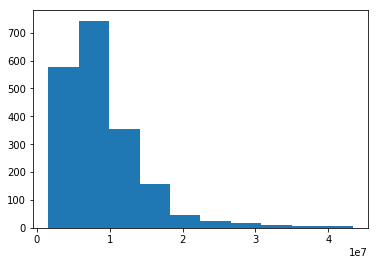

In [54]:
plt.hist(subdata.price)
plt.show()

Plotting a boxplot on <b>price</b>, there seems to be possible outliers given the current scale of the data values in <b>price</b>.

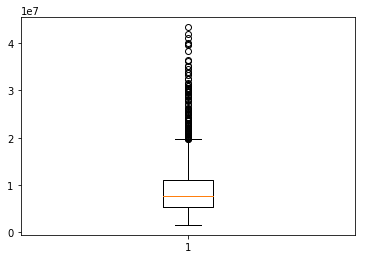

In [55]:
plt.boxplot(subdata.price)
plt.show()

We try to explore if there are indeed outliers in <b>price</b> based on the distribution and what was observed in the boxplot. 

From the lecture notes in Week 8, for a point x to be classified as an outlier based on boxplots:
- Lower outlier if x < Q1 - 1.5 (IQR)
- Upper outlier if x > Q3 + 1.5 (IQR)<br>
where Q1 refers to 25% quartile, Q3 refers to 75% quartile and IQR refers to Interquartile range (Q3 - Q1)

We know that Q1 is 5322500, Q3 is 11070000. Hence IQR = Q3 - Q1 = 5747500.
Hence, point x is an outlier in <b>price</b> if:
- Lower outlier if x < 5322500 - 1.5 (5747500) = -3298750
- Upper outlier if x > 11070000 + 1.5 (5747500) = 19691250

Since we know the minimum is 1568000 while the maximum is 43350000, there are no lower outliers but there are <b>96</b> upper outliers.

In [56]:
len(subdata.loc[subdata.price>19691250,:])

96

## B4. Normalization
### B4.1 Standardization (Z-score Normalization)
We first explore standardizing the data so that they are centered around 0 (i.e. mean around 0) and standard deviation of 1. <br><br>
We make use of the `scikit-learn` package and standardised the <b>price</b> column.<br>

In [57]:
# fit the standard normal scale to 'price'
std_scale = preprocessing.StandardScaler().fit(subdata[['price']])
# transform the value of 'price' based on the new standard normal scale
df_std = std_scale.transform(subdata[['price']])
# create a column 'Zscore' that stores the values of 'price' after standardization
subdata['Zscore'] = df_std
# print out first 10 rows of the original 'price' and the standardized 'price'
subdata.loc[:,['price','Zscore']].head(10)

C:\Users\tanka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,price,Zscore
0,7440000,-0.286331
1,3285000,-1.024611
2,7700000,-0.240133
3,21000000,2.123074
4,6320000,-0.485338
5,9490000,0.077923
6,19650000,1.883199
7,7072000,-0.351719
8,4125000,-0.875355
9,7040000,-0.357405


Looking at the distribution of the <b>Zscore</b> column below:
* The mean is approximately 0 and it's standard deviation is approximately 1.<br>
* The minimum is now -1.329695 while the maximum is 6.094326.<br>
* The maximum is roughly 5 times that of the minimum value (i.e. 6.094326/1.329695), which is significantly lower than the 27 times as compared in the original <b>price</b> (i.e. 43350000/1568000).
* The mean is greater than the median, which indicates a right-skewed distribution.

In [58]:
subdata.loc[:,['price','Zscore']].describe()

,price,Zscore
count,1.943000e+03,1.943000e+03
mean,9.051454e+06,1.422777e-17
std,5.629396e+06,1.000257e+00
min,1.568000e+06,-1.329695e+00
25%,5.322500e+06,-6.625780e-01
50%,7.700000e+06,-2.401327e-01
75%,1.107000e+07,3.586647e-01
max,4.335000e+07,6.094326e+00


Looking at the boxplot and histogram of <b>Zscore</b>, the distribution is right-skewed and there's possibility of upper outliers.

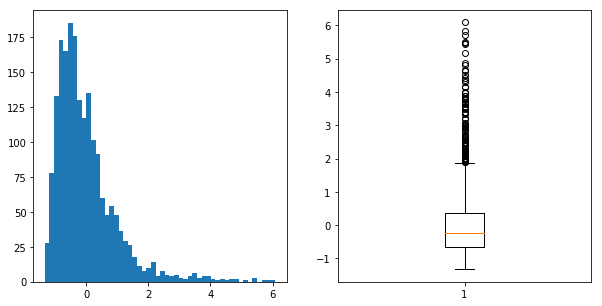

In [59]:
# histogram of Zscore
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(subdata.Zscore,bins=50)
# boxplot of Zscore
plt.subplot(1,2,2)
plt.boxplot(subdata.Zscore)
plt.show()

We try to explore if there are indeed outliers in <b>Zscore</b> based on the distribution. 

We know that Q1 is -0.6625780, Q3 is 0.3586647. Hence IQR = Q3 - Q1 = 1.021243.
Hence, point x is an outlier in <b>Zscore</b> if:
- Lower outlier if x < -0.6625780 - 1.5 (1.021243) = -2.194442
- Upper outlier if x > 0.3586647 + 1.5 (1.021243) = 1.890529

Since we know the minimum is -1.329695 while the maximum is 6.094326, there are no lower outliers but there are <b>96</b> upper outliers, which was the same compared to the original <b>price</b>.

In [60]:
len(subdata.loc[subdata.Zscore>1.890529,:])

96

### B4.2  Minmax Normalization
The next method of data normalization we will explore is minmax normalization which involves rescaling the variable so that their values are in a specific range.
<br><br>
We make use of the `MinMaxScaler` function in `scikit-learn` package and normalized the <b>price</b> column.<br>
This will normalize the values to between 0 and 1.

In [61]:
# fit the minmax scale to 'price'
minmax_scale = preprocessing.MinMaxScaler().fit(subdata[['price']])
# transform the value of 'price' based on the new minmax scale
df_minmax = minmax_scale.transform(subdata[['price']])
# create a column 'minmax' that stores the values of 'price' after minmax normalization
subdata['minmax'] = df_minmax
# print out first 10 rows of the original 'price' and the normalized 'price'
subdata.loc[:,['price','minmax']].head(10)

C:\Users\tanka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,price,minmax
0,7440000,0.140539
1,3285000,0.041094
2,7700000,0.146762
3,21000000,0.465081
4,6320000,0.113733
5,9490000,0.189603
6,19650000,0.432770
7,7072000,0.131731
8,4125000,0.061199
9,7040000,0.130965


Looking at the distribution of the <b>minmax</b> column below:
* The mean is 0.179107 and it's standard deviation is 0.134733.<br>
* The minimum is now 0 while the maximum is 1, which was expected as we scaled the data based on the range [0,1]<br>
* The mean is greater than the median, which indicates a right-skewed distribution.

In [62]:
subdata.loc[:,['price','minmax']].describe()

,price,minmax
count,1.943000e+03,1943.000000
mean,9.051454e+06,0.179107
std,5.629396e+06,0.134733
min,1.568000e+06,0.000000
25%,5.322500e+06,0.089859
50%,7.700000e+06,0.146762
75%,1.107000e+07,0.227419
max,4.335000e+07,1.000000


Looking at the boxplot and histogram of <b>minmax</b>, the distribution is right-skewed and there's possibility of upper outliers.

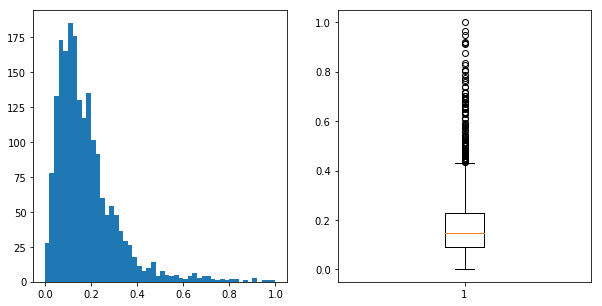

In [63]:
# histogram of minmax
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(subdata.minmax,bins=50)
# boxplot of minmax
plt.subplot(1,2,2)
plt.boxplot(subdata.minmax)
plt.show()

We try to explore if there are indeed outliers in <b>minmax</b> based on the distribution. 

We know that Q1 is 0.089859, Q3 is 0.227419. Hence IQR = Q3 - Q1 = 0.13756.
Hence, point x is an outlier in <b>minmax</b> if:
- Lower outlier if x < 0.089859 - 1.5 (0.13756) = -0.116481
- Upper outlier if x > 0.227419 + 1.5 (0.13756) = 0.433759

Since we know the minimum is 0 while the maximum is 1, there are no lower outliers but there are <b>96</b> upper outliers, which was the same compared to the original <b>price</b>.

In [64]:
len(subdata.loc[subdata.minmax>0.433759,:])

96

## B5. Transformation
### B5.1 Root Transformation
We first explore the method of root transformation on <b>price</b> by taking the root of the value of <b>price</b>.

In [65]:
# empty list to store the root price
root_price=[]
# loop through each price and append to list it's root price
for each in subdata.price.tolist():
    root_price.append(math.sqrt(each))
# create column 'root' which stores the root price
subdata['root']=root_price
# returns first 5 rows of the data
subdata.head()

,property_id,bedrooms,bathrooms,parking_space,property_type,price,Zscore,minmax,root
0,45745,3,1,1,house,7440000,-0.286331,0.140539,2727.636339
1,36585,3,1,1,house,3285000,-1.024611,0.041094,1812.456896
2,35545,3,1,1,house,7700000,-0.240133,0.146762,2774.887385
3,88657,4,2,2,house,21000000,2.123074,0.465081,4582.575695
4,19711,4,2,1,house,6320000,-0.485338,0.113733,2513.961018


Looking at the distribution of the <b>root</b> column below:
* The mean is 2891.204394 and it's standard deviation is 832.314775.<br>
* The minimum is now 1252.198067 while the maximum is 6584.071689.<br>
* The maximum is roughly 5 times that of the minimum value (i.e. 6584.071689/1252.198067), which is significantly lower than the 27 times as compared in the original <b>price</b> (i.e. 43350000/1568000).
* The mean and median is quite close although the mean is still greater than the median, indicating a right-skewed distribution.

In [66]:
subdata.loc[:,['price','root']].describe()

,price,root
count,1.943000e+03,1943.000000
mean,9.051454e+06,2891.204394
std,5.629396e+06,832.314775
min,1.568000e+06,1252.198067
25%,5.322500e+06,2307.054335
50%,7.700000e+06,2774.887385
75%,1.107000e+07,3327.160952
max,4.335000e+07,6584.071689


Looking at the boxplot and histogram of <b>root</b>, the distribution is right-skewed and there's possibility of upper outliers.

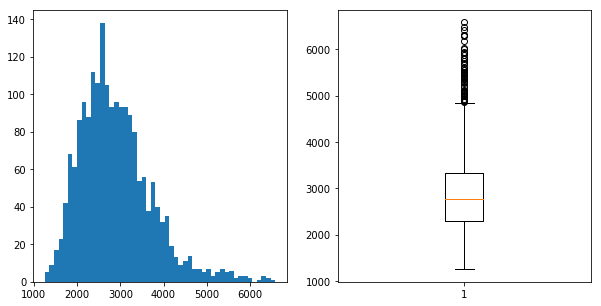

In [67]:
# histogram of root
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(subdata.root,bins=50)
# boxplot of root
plt.subplot(1,2,2)
plt.boxplot(subdata.root)
plt.show()

We try to explore if there are indeed outliers in <b>root</b> based on the distribution. 

We know that Q1 is 2307.054335, Q3 is 3327.160952. Hence IQR = Q3 - Q1 = 1020.107.
Hence, point x is an outlier in <b>root</b> if:
- Lower outlier if x < 2307.054335 - 1.5 (1020.107) = 776.8938
- Upper outlier if x > 3327.160952 + 1.5 (1020.107) = 4857.321

Since we know the minimum is 1252.198067 while the maximum is 6584.071689, there are no lower outliers but there are <b>56</b> upper outliers, which was smaller compared to the original <b>price</b> which had 96 outliers.

In [68]:
len(subdata.loc[subdata.root>4857.321,:])

56

### B5.2 Power Transformation
We then explore the method of power transformation on <b>price</b> by taking the power 2 of the value of <b>price</b>.

In [69]:
# empty list to store the power 2 price
power_price=[]
# loop through each price and append to list it's power 2 price
for each in subdata.price.tolist():
    power_price.append(each*each)
# create column 'power' which stores the power 2 price
subdata['power']=power_price
# returns first 5 rows of the data
subdata.head()

,property_id,bedrooms,bathrooms,parking_space,property_type,price,Zscore,minmax,root,power
0,45745,3,1,1,house,7440000,-0.286331,0.140539,2727.636339,55353600000000
1,36585,3,1,1,house,3285000,-1.024611,0.041094,1812.456896,10791225000000
2,35545,3,1,1,house,7700000,-0.240133,0.146762,2774.887385,59290000000000
3,88657,4,2,2,house,21000000,2.123074,0.465081,4582.575695,441000000000000
4,19711,4,2,1,house,6320000,-0.485338,0.113733,2513.961018,39942400000000


Looking at the distribution of the <b>power</b> column below:
* The mean is 1.136 * 10^14 and it's standard deviation is 1.792 * 10^14.<br>
* The minimum is now 2.459 * 10^12 while the maximum is 1.879 * 10^15.<br>
* The maximum is roughly 765 times that of the minimum value (i.e. 1.879 * 10^15/2.459 * 10^12), which is significantly higher than the 27 times as compared in the original <b>price</b> (i.e. 43350000/1568000).
* The mean is greater than the median, which indicates a right-skewed distribution.

In [70]:
subdata.loc[:,['price','power']].describe()

,price,power
count,1.943000e+03,1.943000e+03
mean,9.051454e+06,1.136026e+14
std,5.629396e+06,1.792059e+14
min,1.568000e+06,2.458624e+12
25%,5.322500e+06,2.832901e+13
50%,7.700000e+06,5.929000e+13
75%,1.107000e+07,1.225449e+14
max,4.335000e+07,1.879222e+15


Looking at the boxplot and histogram of <b>power</b>, the distribution is right-skewed and comparing with the original <b>price</b>, the skew towards the right is actually more significant in the power transformation. Futhermore, there's possibility of upper outliers.

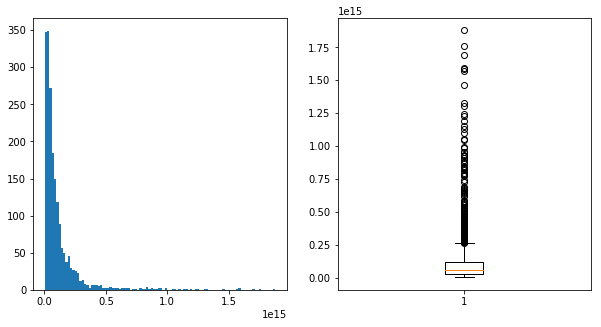

In [71]:
# histogram of power
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(subdata.power,bins=100)
# boxplot of power
plt.subplot(1,2,2)
plt.boxplot(subdata.power)
plt.show()

We try to explore if there are indeed outliers in <b>power</b> based on the distribution. 

We know that Q1 is 2.832901 * 10^13, Q3 is 1.225449 * 10^14. Hence IQR = Q3 - Q1 = 9.421589 * 10^13.
Hence, point x is an outlier in <b>power</b> if:
- Lower outlier if x < 2.832901 * 10^13 - 1.5 (9.421589 * 10^13) = -1.129948 * 10^14
- Upper outlier if x > 1.225449 * 10^14 + 1.5 (9.421589 * 10^13) = 2.638687 * 10^14

Since we know the minimum is 2.459 * 10^12 while the maximum is 1.879 * 10^15, there are no lower outliers but there are <b>164</b> upper outliers, which was greater compared to the original <b>price</b> which had 96 outliers.

In [72]:
len(subdata.loc[subdata.power>2.638687e+14,:])

164

### B5.3 Log Transformation
Finally we explore the method of log transformation on <b>price</b> by taking the log of the value of <b>price</b>.

In [73]:
# empty list to store the log price
log_price=[]
# loop through each price and append to list it's log price
for each in subdata.price.tolist():
    log_price.append(math.log(each))
# create column 'log' which stores the log price
subdata['log']=log_price
# returns first 5 rows of the data
subdata.head()

,property_id,bedrooms,bathrooms,parking_space,property_type,price,Zscore,minmax,root,power,log
0,45745,3,1,1,house,7440000,-0.286331,0.140539,2727.636339,55353600000000,15.822381
1,36585,3,1,1,house,3285000,-1.024611,0.041094,1812.456896,10791225000000,15.004877
2,35545,3,1,1,house,7700000,-0.240133,0.146762,2774.887385,59290000000000,15.856731
3,88657,4,2,2,house,21000000,2.123074,0.465081,4582.575695,441000000000000,16.860033
4,19711,4,2,1,house,6320000,-0.485338,0.113733,2513.961018,39942400000000,15.659230


Looking at the distribution of the <b>log</b> column below:
* The mean is 15.861206 and it's standard deviation is 0.553863.<br>
* The minimum is now 14.265311 while the maximum is 17.584817.<br>
* The maximum is roughly 1.2 times that of the minimum value (i.e. 17.584817/14.265311), which is significantly lower than the 27 times as compared in the original <b>price</b> (i.e. 43350000/1568000).
* The mean is roughly equal to the median, which indicates a symmetrical distribution.

In [74]:
subdata.loc[:,['price','log']].describe()

,price,log
count,1.943000e+03,1943.000000
mean,9.051454e+06,15.861206
std,5.629396e+06,0.553863
min,1.568000e+06,14.265311
25%,5.322500e+06,15.487454
50%,7.700000e+06,15.856731
75%,1.107000e+07,16.219749
max,4.335000e+07,17.584817


Looking at the boxplot and histogram of <b>log</b>, the distribution is symmetrical and log transformation reduced the skew in <b>price</b> distribution. Furthermore, there's possibility of both lower and upper outliers.

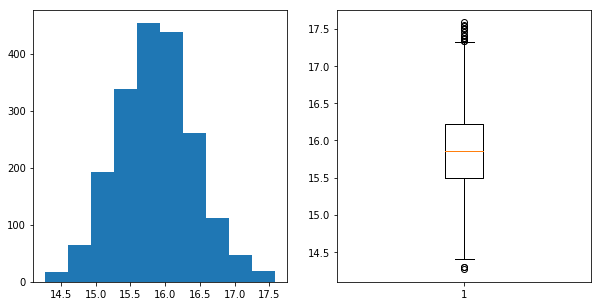

In [75]:
# histogram of log
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(subdata.log)
# boxplot of log
plt.subplot(1,2,2)
plt.boxplot(subdata.log)
plt.show()

We try to explore if there are indeed outliers in <b>log</b> based on the distribution. 

We know that Q1 is 15.487454, Q3 is 16.219749. Hence IQR = Q3 - Q1 = 0.732295.
Hence, point x is an outlier in <b>log</b> if:
- Lower outlier if x < 15.487454 - 1.5 (0.732295) = 14.38901
- Upper outlier if x > 16.219749 + 1.5 (0.732295) = 17.31819

Since we know the minimum is 14.265311 while the maximum is 17.584817:
- there are 3 lower outliers
- there are 14 upper outliers<br>
<br>
In total, there's 17 outliers which was lower than the 96 in the original <b>price</b>.

In [76]:
# print number of lower outliers
print(len(subdata.loc[subdata.log<14.38901,:]))
# print number of upper outliers
print(len(subdata.loc[subdata.log>17.31819,:]))

3
14


## B6. Overall Comparison
If we were to plot the data points for each of the methods and comparing to the original <b>price</b> in the plots below:
<br>
1) Standardised (Z-Score) Price:
- similar to the original price

2) Minmax normalised Price:
- similar to the original price

3) Root Transformed Price:
- slightly more symmetrical compared to the right skewed distribution in the original price
- data points are more spread out and less outliers

4) Power 2 Transformed Price:
- more right skewed distributed than the original price
- data points are more concentrated in the left extreme and there are more outliers

5) Log Transformed Price:
- symmetrical distribution compared to the right skewed distribution in the original price
- data points are more spread out and significantly less outliers

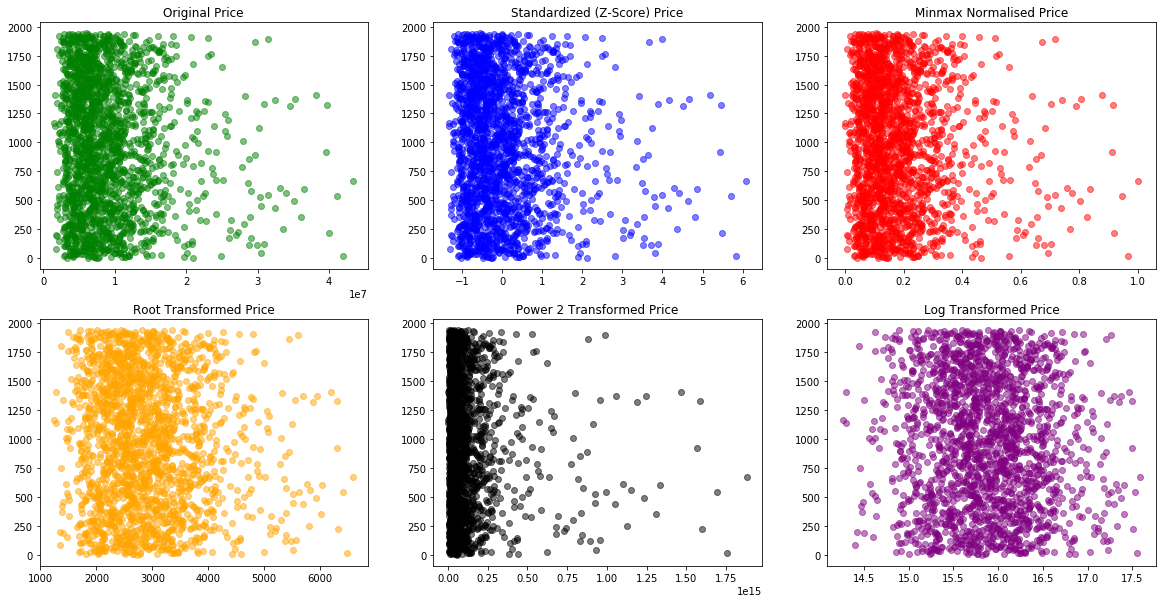

In [77]:
plt.figure(figsize=(20,10))
# plot the original price
plt.subplot(2,3,1)
plt.scatter(subdata.price, subdata.index,color='green', alpha=0.5)
plt.title('Original Price')
# plot the Zscore price
plt.subplot(2,3,2)
plt.scatter(subdata.Zscore, subdata.index,color='blue', alpha=0.5)
plt.title('Standardized (Z-Score) Price')
# plot the minmax price
plt.subplot(2,3,3)
plt.scatter(subdata.minmax, subdata.index,color='red', alpha=0.5)
plt.title('Minmax Normalised Price')
# plot the root transformed price
plt.subplot(2,3,4)
plt.scatter(subdata.root, subdata.index,color='orange', alpha=0.5)
plt.title('Root Transformed Price')
# plot the power 2 price
plt.subplot(2,3,5)
plt.scatter(subdata.power, subdata.index,color='black', alpha=0.5)
plt.title('Power 2 Transformed Price')
# plot the log price
plt.subplot(2,3,6)
plt.scatter(subdata.log, subdata.index,color='purple', alpha=0.5)
plt.title('Log Transformed Price')
plt.show()

Concluding the effects of different normalization/transformation methods on the <b>price</b> attribute and assuming we want to build a linear model on <b>price</b> as the target variable, the best method is <b>log transformation</b> followed by <b>root transformation</b>.
<br><br>
As the data of <b>price</b> is positively skewed and is in high powers of 10, we will need to compress these large values. Normalizing <b>price</b> using <b>standardization (Z-score)</b> and <b>minmax normalization</b> will not affect the data distribution much. We measure the mean-square error in a regression linear model to gauge whether the model is a good fit, if the distribution of the <b>standardized</b> and <b>minmax normalized</b> price remains the same as the original price, the mean-square error of the 2 will be the same as that of the <b>price</b>. Furthermore, the number of outliers is the same compared to the original <b>price</b> which is 96. If we were to remove the outliers before training the model, the fit of the model might be worse and the MSE might be greater as we are losing data points.
<br><br>
Similarly for <b>Power transformation</b>, since the data values of <b>price</b> is already in high powers of 10, increasing the power of the values will make the data values larger resulting in more extreme values (larger values get larger), which was what was observed in the plot above as we saw the distribution becoming more skewed. The number of outliers in this transformation for <b>price</b> is 164 which is greater than the 96 in the original <b>price</b>. Hence if we were to remove more data points, the fit of the model might be worse and MSE might be greater as compared to the original <b>price</b>.
<br><br>
For <b>Root transformation</b>, firstly the large values are being suppressed resulting in the model being more symmetrical and the number of outliers has been reduced from 96 to 56. The linear regression model will have a better fit and lower MSE as we are removing less data points/outliers compared to the original <b>price</b>.
<br><br>
<b>Log transformation</b> is better than <b>Root transformation</b> as firstly, the large values are suppressed to a greater extent resulting in distribution being more symmetrical and the number of outliers is just 17. MSE of the linear model using <b>Log transformation</b> will definitely be lower than <b>Root transformation</b>, and definitely lower than the model using the original <b>price</b>.

## Summary for Task 2
The following normalization/transformation methods were performed on the <b>price</b> attribute:<br>
* Section B4.1 - Standardization (Z-score Normalization)
* Section B4.2 - Minmax Normalization
* Section B5.1 - Log Transformation
* Section B5.2 - Power Transformation
* Section B5.3 - Sqrt Transformation
<br><br>
The 5 methods were then compared and concluded in Section B6.

# ------------------------------------------- End of Task 2-------------------------------------------

## References
[1] - https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points <br>
[2] - https://pypi.org/project/pyshp/